# Chapter 4 - Linear models
## 4.1

In [105]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import seaborn as sns

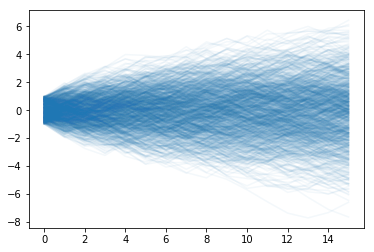

In [110]:
pos = [np.cumsum(stats.uniform.rvs(loc = -1, scale = 2, size = 16)) for i in range(1000)]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
for i in enumerate(pos):
    ax1.plot(i[1], '-', color = 'tab:blue', alpha = 0.05)
plt.show()

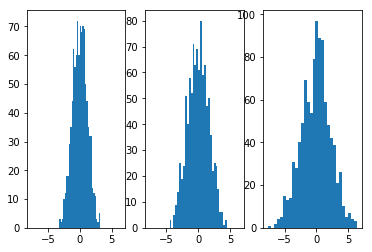

In [111]:
plt.close()
f, axarr = plt.subplots(1,3, sharex = True)
final_pos = np.zeros([1,3])
two_pos = np.ones([1,3])
a = np.vstack((final_pos, two_pos))

for i in enumerate(pos):
    final_pos = np.vstack((final_pos, [i[1][j] for j in [3,7,15]]))

for i in range(3):
    axarr[i-1].hist(final_pos[:, i-1], bins = 30)

plt.show()

## 4.2 - 4.3

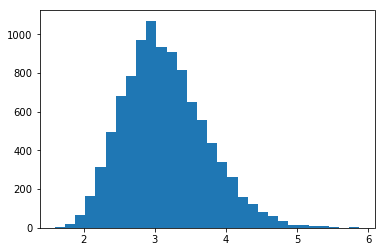

In [112]:
np.prod(stats.uniform.rvs(loc = 1, scale = 0.2, size = 12))
growth = [np.prod(stats.uniform.rvs(loc = 1, scale = 0.2, size = 12)) for i in range(10000)]
plt.hist(growth, bins = 30)
plt.show()

## 4.4

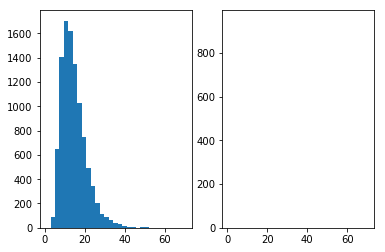

In [113]:
plt.close()
big   = [np.prod(stats.uniform.rvs(loc = 1, scale = 0.5,  size = 12)) for i in range(10000)]
small = [np.prod(stats.uniform.rvs(loc = 1, scale = 0.01, size = 12)) for i in range(10000)]
f, axarr = plt.subplots(1,2, sharex = True)
axarr[0].hist(big, bins = 30)
axarr[1].hist(small, bins = 30)
plt.show()

## 4.5

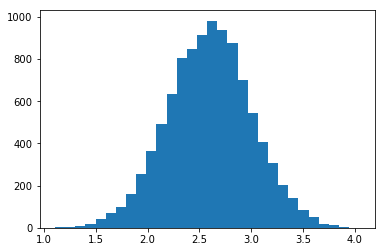

In [114]:
logbig = [np.log(np.prod(stats.uniform.rvs(loc = 1, scale = 0.5,  size = 12))) for i in range(10000)]
plt.hist(logbig, bins = 30)
plt.show()

## 4.7 - 4.8

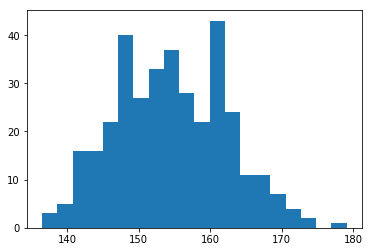

In [11]:
d = pd.read_csv('../data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]
plt.hist(d2.height, bins = 20)
plt.show()

## 4.11 - 4.12

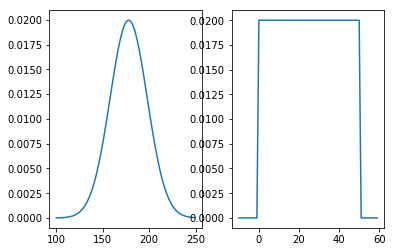

In [18]:
plt.close()
f, axarr = plt.subplots(1,2, sharex = False)
axarr[0].plot(range(100,250), [stats.norm.pdf(x, 178, 20) for x in range(100,250)], '-')
axarr[1].plot(range(-10,60), [stats.uniform.pdf(x, 0, 50) for x in range(-10,60)], '-')
plt.show()

## 4.13

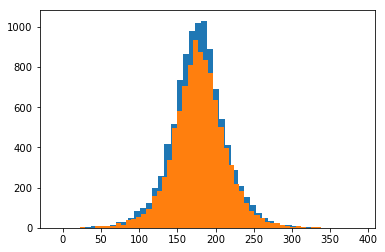

In [23]:
sample_mu = stats.norm.rvs(size = 10000, loc = 178, scale = 20)
sample_sigma = stats.uniform.rvs(size = 10000, loc = 0, scale = 50)
prior_h = stats.norm.rvs(size = 10000, loc = sample_mu, scale = sample_sigma)
plt.hist(prior_h, bins = 50)
plt.show()

## 4.14

In [94]:
post_grid = np.mgrid[140:160:200j, 4:9:200j]
post = post_grid.reshape((2, -1)).T
ll = [sum(stats.norm.logpdf(d2.height, loc = e[0], scale = e[1])) for i,e in enumerate(post)]
prod = ll + stats.norm.logpdf(post[:,0], loc = 178, scale = 20) + stats.norm.logpdf(post[:,1], loc = 0, scale = 50)
prob = np.exp(prod - max(prod))

## 4.15

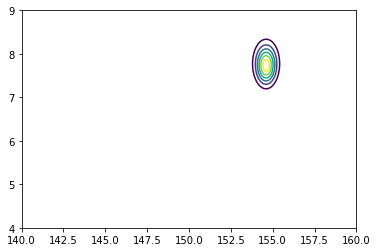

In [98]:
plt.contour(post_grid[0],post_grid[1], prob.reshape((200,-1)))
plt.show()

## 4.16

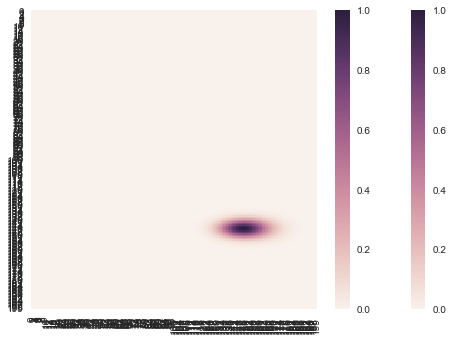

In [108]:
prob_grid = prob.reshape((200,-1))
sns.heatmap(prob_grid)
plt.show()

## 4.17 -4.18

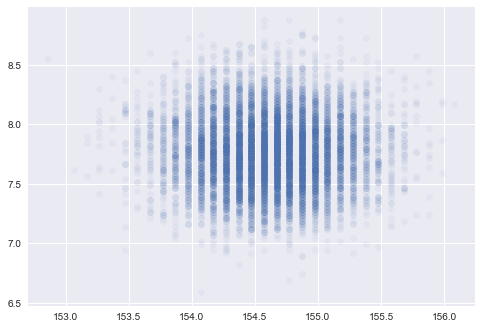

In [120]:
rows = np.random.choice(range(len(post)), size = 10000, replace = True, p = prob/sum(prob))
plt.plot(post[rows, 0], post[rows, 1], 'o', alpha = 0.05)
plt.show()

## 4.19 

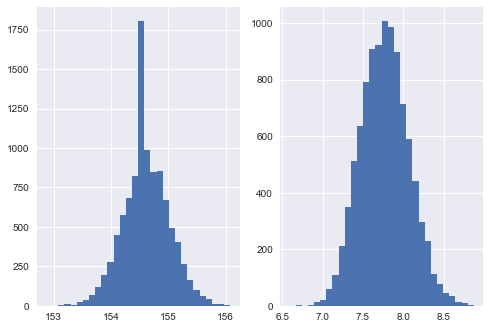

In [122]:
plt.close()
f, axarr = plt.subplots(1,2, sharex = False)
axarr[0].hist(post[rows, 0], bins = 30)
axarr[1].hist(post[rows, 1], bins = 30)
plt.show()

## 4.20

In [127]:
[pm.hpd(post[rows, 0], alpha = 0.05), pm.hpd(post[rows, 1], alpha = 0.05)]

[array([ 153.66834171,  155.27638191]), array([ 7.16582915,  8.29648241])]